# 0519

Related links

- [Course website](https://www-math.nsysu.edu.tw/~chlin/2025SMath599/2025SMath599.html)
- [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)

## Data

In [9]:
### load nsysu

import os
import urllib
import numpy as np

base = r"https://github.com/SageLabTW/auto-grading/raw/master/nsysu-digits/"
for c in ['X', 'y']:
    filename = "nsysu-digits-%s.csv"%c
    if filename not in os.listdir('.'):
        print(filename, 'not found --- will download')
        urllib.request.urlretrieve(base + c + ".csv", filename)

Xsys = np.genfromtxt('nsysu-digits-X.csv', dtype=int, delimiter=',') ### flattened already
ysys = np.genfromtxt('nsysu-digits-y.csv', dtype=int, delimiter=',')

In [10]:
# load MNIST (long)

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

[Sample DataFrame](https://docs.google.com/spreadsheets/d/1pzcuTVMyRhBrwmcpOnGILUjMsPeF8fjkSSLwUuevXJ0/edit?usp=sharing)

In [11]:
from sklearn import datasets
titanic = datasets.fetch_openml(name='titanic', version=1, as_frame=True)

In [12]:
# required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## [In-Depth: Manifold Learning](https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html)

- MDS
- LLE
- IsoMap

In [13]:
# iris
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

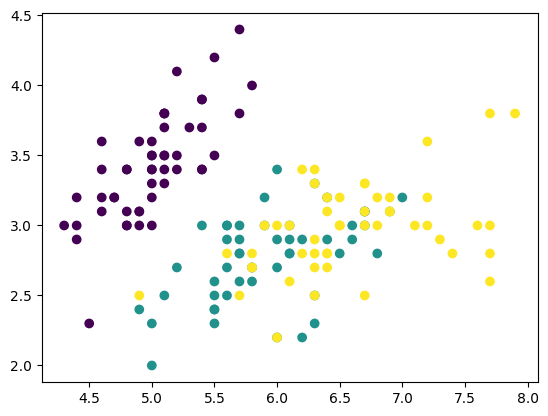

In [14]:
plt.scatter(X[:,0], X[:,1], c=y)

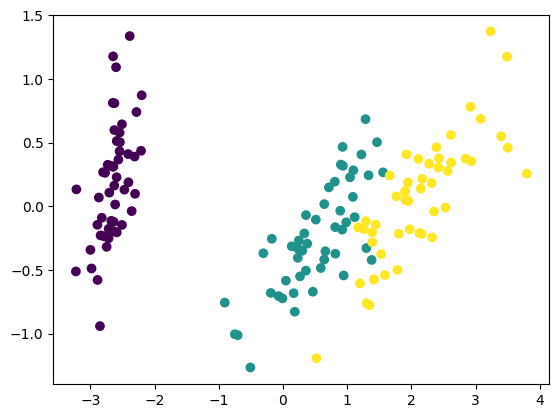

In [15]:
# PCA, MDS, LLE, IsoMap
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, LocallyLinearEmbedding, Isomap
model = PCA(2)
X_new = model.fit_transform(X)
plt.scatter(*X_new.T, c=y)

In [16]:
def make_hello(N=1000, rseed=42):
    # Make a plot with "HELLO" text; save as PNG
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    
    # Open this PNG and draw random points from it
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]

C:\Users\User\AppData\Local\Temp\ipykernel_14584\1703149913.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))


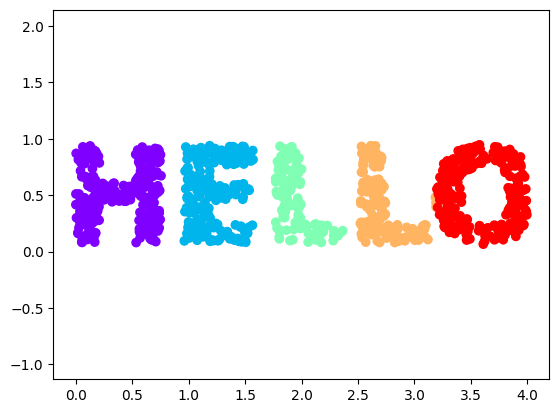

In [17]:
X = make_hello(1000)
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal');

In [18]:
def random_projection(X, dimension=3, rseed=42):
    assert dimension >= X.shape[1]
    rng = np.random.RandomState(rseed)
    C = rng.randn(dimension, dimension)
    e, V = np.linalg.eigh(np.dot(C, C.T))
    return np.dot(X, V[:X.shape[1]])

In [19]:
X3 = random_projection(X)
X3.shape

(1000, 3)

For LLE, (n_neighbors, n_components).

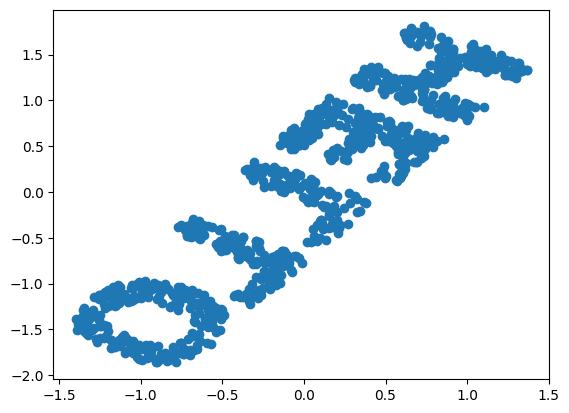

In [20]:
# PCA, MDS, LLE, IsoMap
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, LocallyLinearEmbedding, Isomap
model = MDS(n_components=2)
X_new = model.fit_transform(X3)
plt.scatter(*X_new.T)

* PCA: project onto a plane
* MDS: try to preserve the pairwise (extrinsic) distances
* LLE: local PCA
* IsoMap: try to preserve the pairwise (intrinsic) distances

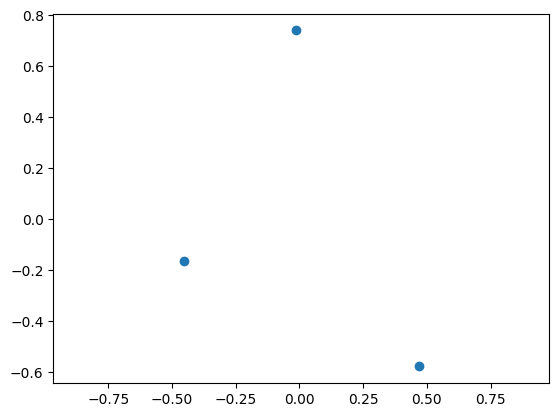

In [21]:
# MDS with dissimilarity="precomputed" ~ distance
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity="precomputed")
distance = np.array([
    [0,1,np.sqrt(2)],
    [1,0,1],
    [np.sqrt(2),1,0]
])
# distance = np.array([
#     [0,1,1,1],
#     [1,0,1,1],
#     [1,1,0,1],
#     [1,1,1,0]
# ])
X_new = model.fit_transform(distance)
plt.axis("equal")
plt.scatter(*X_new.T)

Nonlinear cases: see textbook

Read [Example: Isomap on Faces](https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html#Example:-Isomap-on-Faces)

Read [Example: Visualizing Structure in Digits](https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html#Example:-Visualizing-Structure-in-Digits)

## [In Depth: k-Means Clustering](https://jakevdp.github.io/PythonDataScienceHandbook/05.13-kernel-density-estimation.html)

- center of a cluster
- label by the centers

In [22]:
# iris
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


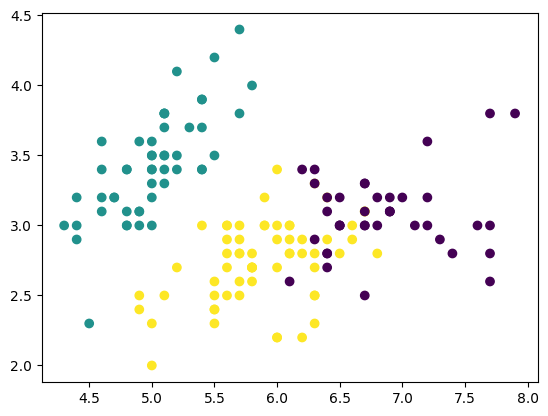

In [23]:
from sklearn.cluster import KMeans
model = KMeans(3) # k = ?
y_new = model.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=y_new)
print(y_new)

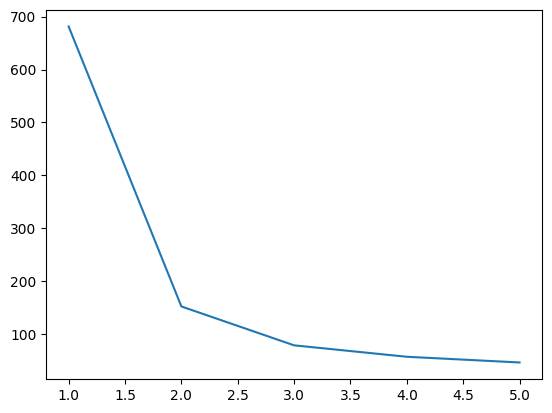

In [24]:
from sklearn.cluster import KMeans
inertias = []
for k in range(1,6):
    model = KMeans(k)
    model.fit(X)
    inertias.append(model.inertia_)
plt.plot(np.arange(1,6), inertias)

In [25]:
# digits 0 and 1
mask0 = (ysys == 0)
mask1 = (ysys == 1)
X = Xsys[mask0 | mask1,:]
y = ysys[mask0 | mask1]

In [26]:
from sklearn.cluster import KMeans
model = KMeans(2) # k = ?
y_new = model.fit_predict(X)
print(y)
print(y_new)

[0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1
 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1
 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1
 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1
 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0 1 0
 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1 1 1
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1
 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 1]
[0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0

Expectation--Maximization  

1. Guess some cluster centers
2. Repeat until converged
    1. E-Step: assign points to the nearest cluster center
    2. M-Step: set the cluster centers to the mean

Caveats: see textbook

Read [Example 1: k-means on digits](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html#Example-1:-k-means-on-digits)

Read [Example 2: k-means for color compression](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html#Example-2:-k-means-for-color-compression)

## [In Depth: Gaussian Mixture Models](https://jakevdp.github.io/PythonDataScienceHandbook/05.13-kernel-density-estimation.html)

same story as $k$-means

- compute the mean and variance of a cluster
- label by the most likely source

[2 2 1 2 0 2 2 0 2 1 2 2 2 2 0 2 0 2 0 1 2 2 2 1 1 1 1 2 2 0 2 2 1 2 0 2 1
 2 0 2 2 1 0 2 0 2 2 0 2 0 0 0 0 2 2 2 2 2 0 2 1 2 2 2 2 2 2 2 2 1 2 0 2 2
 0 2 2 1 0 2 0 2 2 2 1 0 1 2 1 2 0 0 2 2 2 2 2 0 0 2 2 2 2 2 0 1 1 1 0 2 2
 2 0 0 2 0 0 0 2 1 0 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 0 2 2 2 1 0 0 1 2 0 0 2
 2 1 1 2 2 2 2 0 2 0 0 2 2 2 2 2 0 0 1 2 2 2 0 0 1 1 2 2 2 2 2 2 2 1 1 1 1
 2 1 1 2 0 2 0 0 2 2 2 0 0 2 2 2 0 2 2 2 2 2 0 2 2 1 0 2 2 1 2 2 0 2 2 0 0
 0 2 1 1 2 2 2 2 1 2 0 1 0 2 0 2 2 0 2 2 2 1 1 2 1 0 2 2 2 0 2 2 1 2 2 2 2
 2 2 2 0 2 2 2 0 2 2 0 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 1 0 1 2 2 2 1 1 2
 0 0 0 2 0 0 2 2 0 1 2 2 0 1 0 2 2 2 1 2 0 2 2 2 2 1 2 2 1 1 1 1 1 2 2 2 1
 0 0 0 0 2 2 2 2 0 2 2 2 2 2 1 1 0 1]


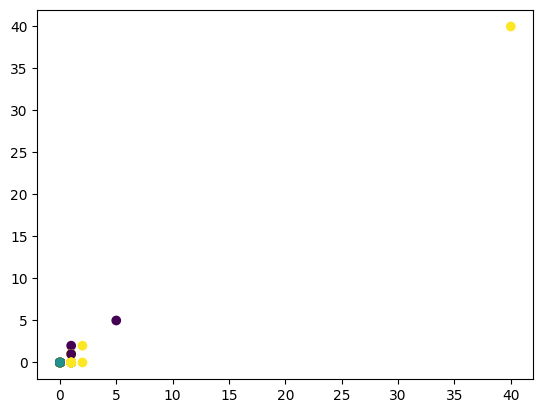

In [27]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(3) # k = ?
y_new = model.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=y_new)
print(y_new)

`covariance_type` : 

- `spherical`
- `diag`
- `full`

Read [Example: GMM for Generating New Data](https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html#Example:-GMM-for-Generating-New-Data)

## Homework

- Type your answers here and submit your answer in `*.ipynb` format.
- You may use code cell and Markdown cell.

In [28]:
NAME = "李瑋宸" # change to your name
STD_ID = "B123245008" # change to your student ID
print("My name is %s and my student ID is %s."%(NAME, STD_ID))

My name is 李瑋宸 and my student ID is B123245008.


1. **Isomap vs. PCA**

   * Load the `digits` dataset from `sklearn.datasets`.
   * Apply both PCA and Isomap to reduce the data to 2D.
   * Visualize the 2D projections and compare their effectiveness in preserving the class structure.

C:\Users\User\AppData\Local\Temp\ipykernel_14584\551001837.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.get_cmap('rainbow', 10))
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_isomap.py:384: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\sparse\_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\User\AppData\Local\Temp\ipykernel_14584\551001

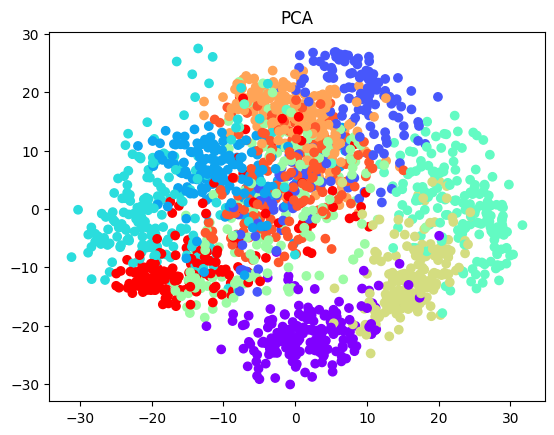

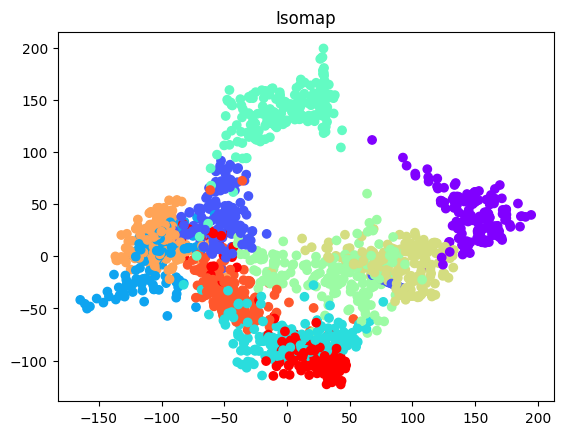

In [29]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt

digits = load_digits()
X = digits.data
y = digits.target

model = PCA(n_components=2)
X_pca = model.fit_transform(X)
plt.title("PCA")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.get_cmap('rainbow', 10))

model = Isomap(n_components=2)
X_iso = model.fit_transform(X)
plt.figure()
plt.title("Isomap")
plt.scatter(X_iso[:, 0], X_iso[:, 1], c=y, cmap=plt.cm.get_cmap('rainbow', 10))


2. **Exploring t-SNE Perplexity**

   * Use t-SNE on the `digits` dataset with varying `perplexity` values (e.g., 5, 30, 50).
   * Plot the results and discuss how the choice of perplexity affects the clustering.

C:\Users\User\AppData\Local\Temp\ipykernel_14584\2908483620.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=plt.cm.get_cmap('rainbow', 10))


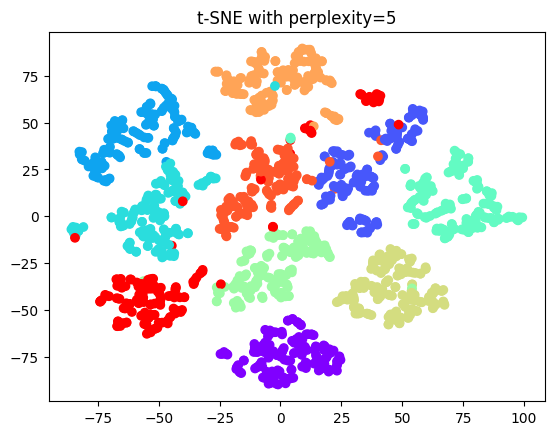

C:\Users\User\AppData\Local\Temp\ipykernel_14584\2908483620.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=plt.cm.get_cmap('rainbow', 10))


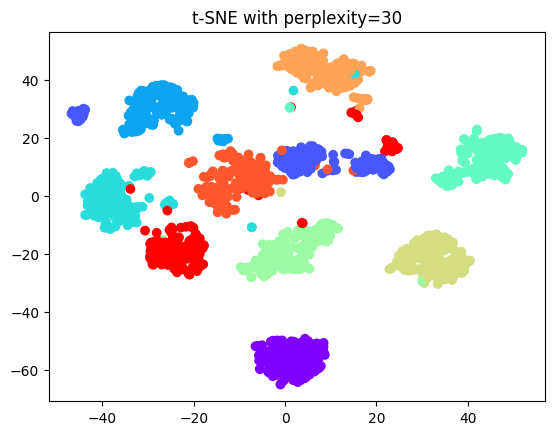

C:\Users\User\AppData\Local\Temp\ipykernel_14584\2908483620.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=plt.cm.get_cmap('rainbow', 10))


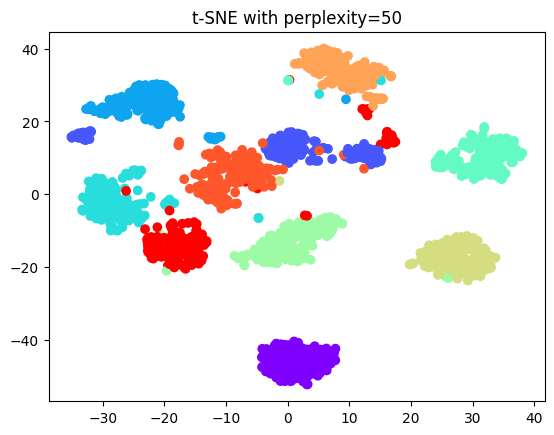

In [30]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target

for i in [5,30,50]:
    model = TSNE(n_components=2, perplexity=i)
    X_tsne = model.fit_transform(X)
    plt.figure()
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=plt.cm.get_cmap('rainbow', 10))
    plt.title(f"t-SNE with perplexity={i}")
    plt.show()


3. **Manifold Learning Performance**

   * Generate an S-curve or Swiss roll using `sklearn.datasets.make_s_curve` or `make_swiss_roll`.
   * Apply Isomap, LLE, and MDS.
   * Compare how well each method recovers the intrinsic 2D structure.

C:\Users\User\AppData\Local\Temp\ipykernel_14584\525624878.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.scatter(X_mds[:, 0], X_mds[:, 1], c=y, cmap=plt.cm.get_cmap('rainbow', 10))
C:\Users\User\AppData\Local\Temp\ipykernel_14584\525624878.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.scatter(X_lle[:, 0], X_lle[:, 1], c=y, cmap=plt.cm.get_cmap('rainbow', 10))
C:\Users\User\AppData\Local\Temp\ipykernel_14584\525624878.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``p

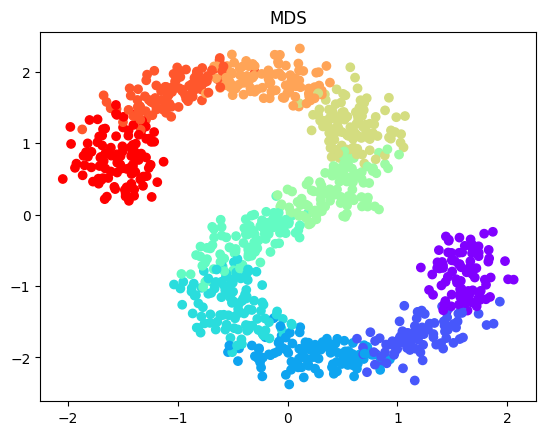

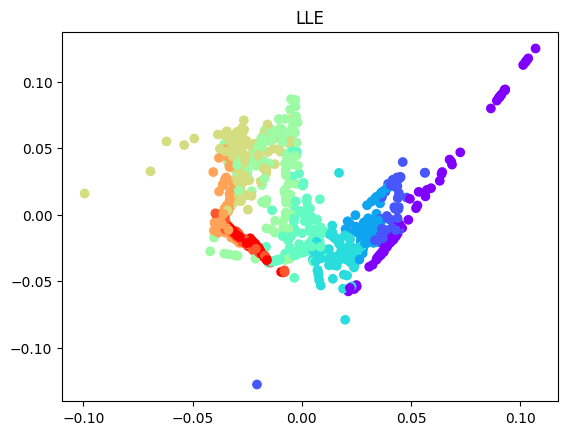

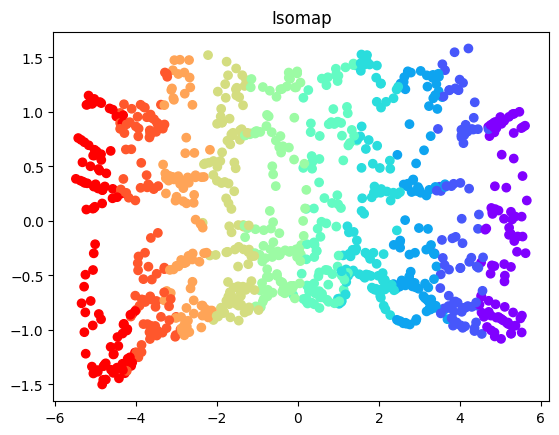

In [31]:
from sklearn.datasets import make_s_curve
from sklearn.manifold import MDS
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import Isomap

curve = make_s_curve(1000, noise=0.1)
X = curve[0]
y = curve[1]

model = MDS(n_components=2)
X_mds = model.fit_transform(X)
plt.figure()
plt.scatter(X_mds[:, 0], X_mds[:, 1], c=y, cmap=plt.cm.get_cmap('rainbow', 10))
plt.title("MDS")

model = LocallyLinearEmbedding(n_components=2)
X_lle = model.fit_transform(X)
plt.figure()
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=y, cmap=plt.cm.get_cmap('rainbow', 10))
plt.title("LLE")

model = Isomap(n_components=2)
X_iso = model.fit_transform(X)
plt.figure()
plt.scatter(X_iso[:, 0], X_iso[:, 1], c=y, cmap=plt.cm.get_cmap('rainbow', 10))
plt.title("Isomap")
plt.show()

4. **LLE Failure Modes**

   * Construct a dataset with `make_moons`.
   * Apply LLE and visualize the results.
   * Describe and explain any limitations or distortions observed.

C:\Users\User\AppData\Local\Temp\ipykernel_14584\1279398055.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.get_cmap('rainbow', 10))
C:\Users\User\AppData\Local\Temp\ipykernel_14584\1279398055.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.scatter(X_lle[:, 0], X_lle[:, 1], c=y, cmap=plt.cm.get_cmap('rainbow', 10))


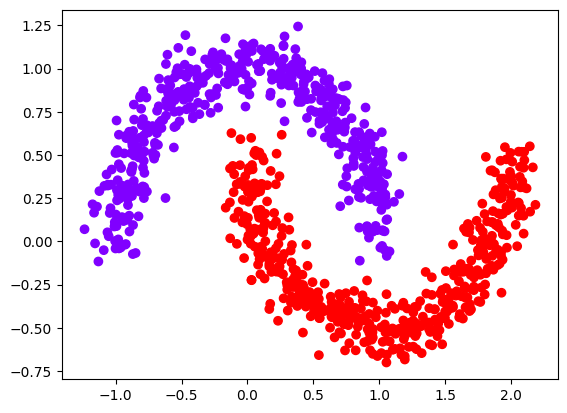

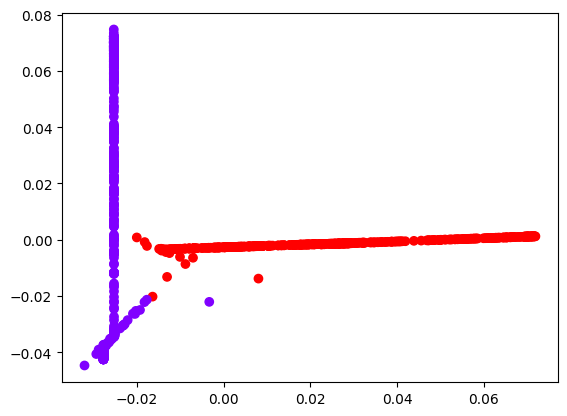

In [32]:
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.datasets import make_moons

# def create_spiral(n_points, noise_std, start_angle, rotation_factor):
#     """創建單個螺旋形狀的資料點。"""
#     n = np.sqrt(np.random.rand(n_points, 1)) * 780 * (2 * np.pi) / 360
#     d1x = -np.cos(start_angle + n * rotation_factor) * n + np.random.rand(n_points, 1) * noise_std
#     d1y = np.sin(start_angle + n * rotation_factor) * n + np.random.rand(n_points, 1) * noise_std
#     return np.vstack((d1x.reshape(-1, 1), d1y.reshape(-1, 1))).T

make_moon = make_moons(n_samples=1000, noise=0.1)
X = make_moon[0]
y = make_moon[1]

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.get_cmap('rainbow', 10))

from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_components=2)
X_lle = model.fit_transform(X)
plt.figure()
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=y, cmap=plt.cm.get_cmap('rainbow', 10))



5. **Compare parameters**

   * Apply LLE to the `digits` dataset using different `n_neighbors` (e.g., 10, 50, 100).  Plot the results.

C:\Users\User\AppData\Local\Temp\ipykernel_14584\3163285388.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.scatter(X_lle[:, 0], X_lle[:, 1], c=y, cmap=plt.cm.get_cmap('rainbow', 10))


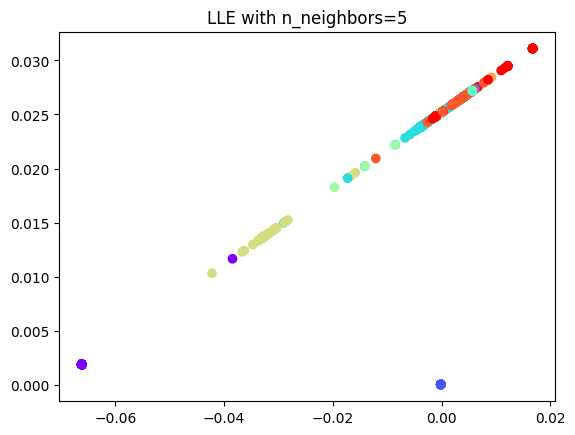

C:\Users\User\AppData\Local\Temp\ipykernel_14584\3163285388.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.scatter(X_lle[:, 0], X_lle[:, 1], c=y, cmap=plt.cm.get_cmap('rainbow', 10))


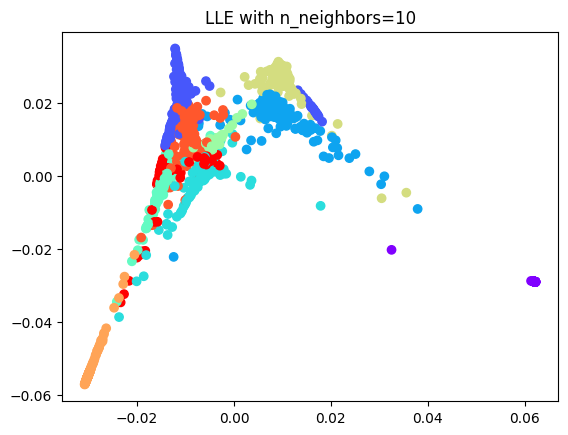

C:\Users\User\AppData\Local\Temp\ipykernel_14584\3163285388.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.scatter(X_lle[:, 0], X_lle[:, 1], c=y, cmap=plt.cm.get_cmap('rainbow', 10))


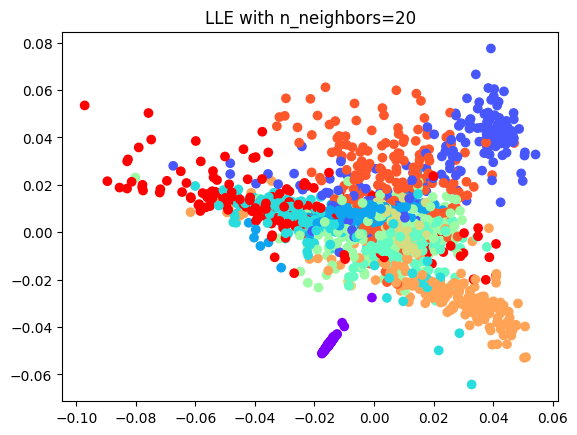

In [33]:
from sklearn.datasets import load_digits
from sklearn.manifold import LocallyLinearEmbedding

digits = load_digits()
X = digits.data
y = digits.target

for i in [5, 10, 20]:
    model = LocallyLinearEmbedding( n_neighbors=i)
    X_lle = model.fit_transform(X)
    plt.figure()
    plt.scatter(X_lle[:, 0], X_lle[:, 1], c=y, cmap=plt.cm.get_cmap('rainbow', 10))
    plt.title(f"LLE with n_neighbors={i}")
    plt.show()

6. **k-Means on Digits Data**

   * Use the `digits` dataset.
   * Apply k-means clustering with `k=10`.
   * Evaluate cluster quality using adjusted Rand index (ARI) or normalized mutual information (NMI).

In [34]:
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score, mutual_info_score

digits = load_digits()
X = digits.data
y = digits.target

model = KMeans(n_clusters=10)
y_pred = model.fit_predict(X)
print("Adjusted Rand Index:", adjusted_rand_score(y, y_pred))
print("Mutual Information:", mutual_info_score(y, y_pred))


Adjusted Rand Index: 0.653959084197318
Mutual Information: 1.6953579022061862


7. **Choosing the Right k**

   * Use the elbow method and inertia to determine an appropriate value for `k` on a synthetic blob dataset.
   * Plot the metrics against different values of `k` and explain your choice.

Distortion values:
1 : 4.938906857808631
2 : 1.9835113563423612
3 : 0.6811180211179981
4 : 0.5965892846557653
5 : 0.5327471646089186
6 : 0.4771865069290977
7 : 0.39675315684094736
8 : 0.34040771902799893
9 : 0.3213710304954206


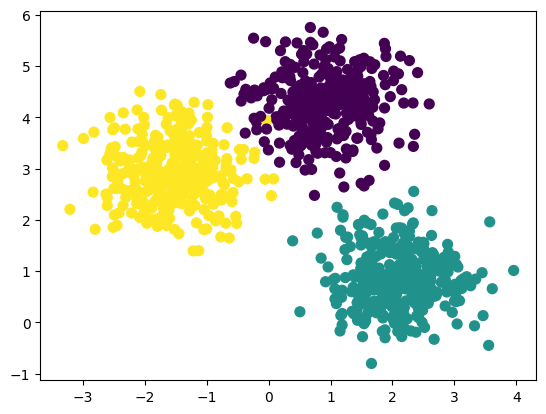

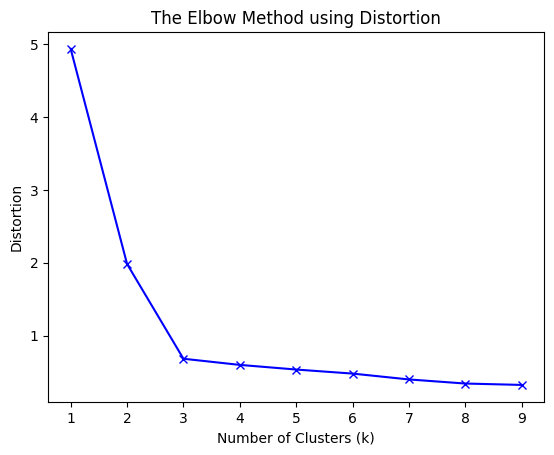

In [39]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np

make_blob = make_blobs(n_samples=1000, centers=3, cluster_std=0.60, random_state=0)
X, y = make_blob

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}

for i in range(1,10):
    model = KMeans(n_clusters=i)
    model.fit(X)
    distortions.append(sum(np.min(cdist(X,model.cluster_centers_, 'euclidean'), axis=1)**2) / X.shape[0])
    inertias.append(model.inertia_)
    mapping1[i] = distortions[-1]
    mapping2[i] = inertias[-1]

print("Distortion values:")
for key, val in mapping1.items():
    print(f'{key} : {val}')

plt.figure()
plt.plot(range(1,10), distortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()


8. **Cluster Initialization Sensitivity**

   * Run k-means multiple times with different random initializations.
   * Visualize the resulting clusters and discuss the stability of the algorithm.

C:\Users\User\AppData\Local\Temp\ipykernel_14584\3031431967.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  ax[i][j].scatter(X[:, 0], X[:, 1], c=y_pred, cmap=plt.cm.get_cmap('rainbow'), s=20)
C:\Users\User\AppData\Local\Temp\ipykernel_14584\3031431967.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  ax[i][j].scatter(X[:, 0], X[:, 1], c=y_pred, cmap=plt.cm.get_cmap('rainbow'), s=20)
C:\Users\User\AppData\Local\Temp\ipykernel_14584\3031431967.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap

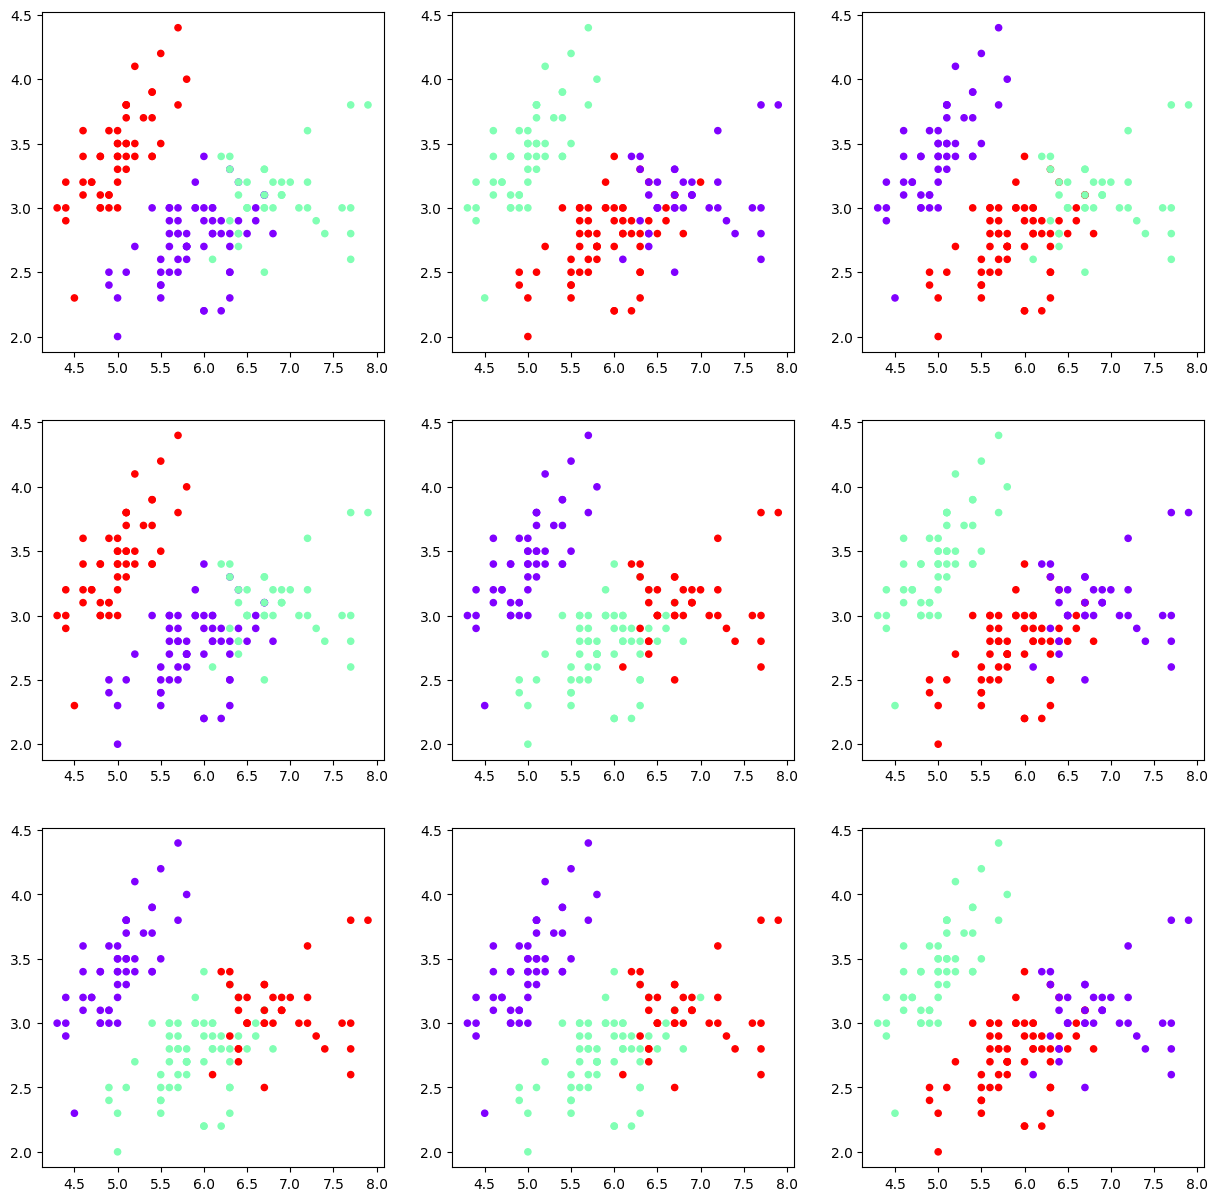

In [40]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target

fig, ax = plt.subplots(3, 3, figsize=(15, 15))

for i in range(3):
    for j in range(3):
        model = KMeans(n_clusters=3)
        y_pred = model.fit_predict(X)
        ax[i][j].scatter(X[:, 0], X[:, 1], c=y_pred, cmap=plt.cm.get_cmap('rainbow'), s=20)
        

9. **GMM vs. k-Means on Non-Spherical Data**

   * Create a dataset of two ellipsoidal clusters using `make_blobs` with different covariance matrices.
   * Fit both k-means and GMM models.
   * Compare their clustering results and visualize decision boundaries.

C:\Users\User\AppData\Local\Temp\ipykernel_14584\3286601493.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.scatter(X1[:, 0], X1[:, 1], c=y1, cmap=plt.cm.get_cmap('rainbow', 10), s=20)
C:\Users\User\AppData\Local\Temp\ipykernel_14584\3286601493.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.get_cmap('rainbow', 10))
C:\Users\User\AppData\Local\Temp\ipykernel_14584\3286601493.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplo

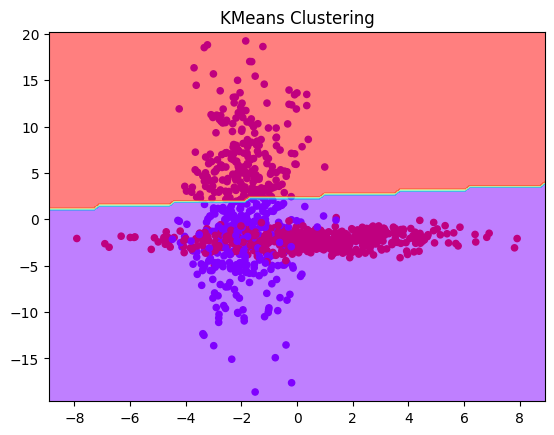

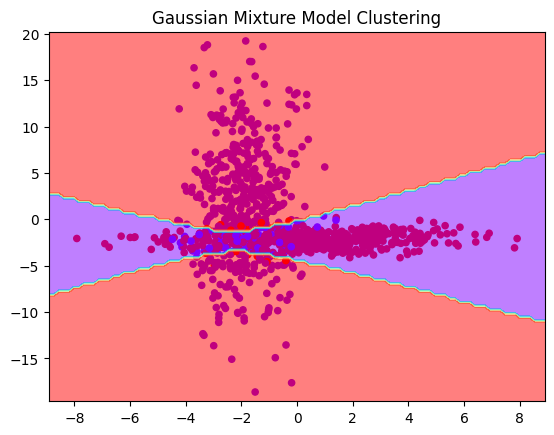

In [41]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np

make_blob = make_blobs(n_samples=1000, centers=2, cluster_std=[[1.0,6.0],[2.5,0.8]])


X1, y1 = make_blob


x1_min, x1_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
x2_min, x2_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1


xx, yy = np.meshgrid(np.linspace(x1_min, x1_max, 100), 
                     np.linspace(x2_min, x2_max, 100))


model_kmeans = KMeans(n_clusters=2)
model_gmm = GaussianMixture(n_components=2)

model_kmeans.fit(X1)
Z = model_kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.scatter(X1[:, 0], X1[:, 1], c=y1, cmap=plt.cm.get_cmap('rainbow', 10), s=20)
plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.get_cmap('rainbow', 10))
plt.title("KMeans Clustering")
plt.figure()
model_gmm.fit(X1)
Z = model_gmm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.scatter(X1[:, 0], X1[:, 1], c=y1, cmap=plt.cm.get_cmap('rainbow', 10), s=20)
plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.get_cmap('rainbow', 10))
plt.title("Gaussian Mixture Model Clustering")
plt.show()

10. **GMM for Density Estimation**

* Use GMM on a 2D dataset (e.g., moon shapes from `make_moons`).
* Generate new 100 samples.

C:\Users\User\AppData\Local\Temp\ipykernel_14584\2813804417.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.get_cmap('rainbow', 10), s=20, alpha=0.1)


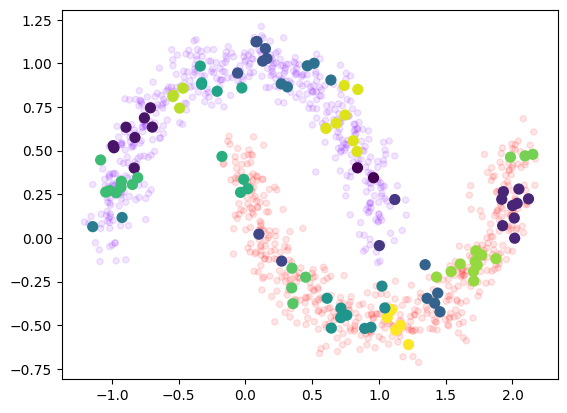

In [42]:
from sklearn.datasets import make_moons
from sklearn.mixture import GaussianMixture
make_moon = make_moons(n_samples=1000, noise=0.1)
X,y = make_moon

model = GaussianMixture(n_components=20)
model.fit(X)
y_new = model.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.get_cmap('rainbow', 10), s=20, alpha=0.1)
new_data = model.sample(100)
y_new_data = model.predict(new_data[0])
plt.scatter(new_data[0][:, 0], new_data[0][:, 1], c=y_new_data, s=50, label='Sampled Data')
